# DRW - Linear Approach

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from functions import preprocess_train, evaluate_model

# Train and Test

In [2]:
data = pd.read_parquet('data/train.parquet')
y = data['label']
X = preprocess_train(data, columns_to_drop=['label', 'bid_qty', 'ask_qty', 'buy_qty', 'sell_qty'])
X = X.sort_index(ascending=True)
X

Columns with infinite values: ['X697', 'X698', 'X699', 'X700', 'X701', 'X702', 'X703', 'X704', 'X705', 'X706', 'X707', 'X708', 'X709', 'X710', 'X711', 'X712', 'X713', 'X714', 'X715', 'X716', 'X717']
Columns with NaN values: []
Columns with zero standard deviation: ['X697', 'X698', 'X699', 'X700', 'X701', 'X702', 'X703', 'X704', 'X705', 'X706', 'X707', 'X708', 'X709', 'X710', 'X711', 'X712', 'X713', 'X714', 'X715', 'X716', 'X717', 'X864', 'X867', 'X869', 'X870', 'X871', 'X872']


,volume,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X887,X888,X889,X890,bidask_ratio,buysell_ratio,bidask_delta,buysell_delta,buysell_size,bidask_size
timestamp,,,,,,,,,,,,,,,,,,,,,
2023-03-01 00:00:00,221.389,0.121263,-0.417690,0.005399,0.125948,0.058359,0.027359,0.035780,0.068219,1.034825,...,0.377630,0.210153,0.159183,0.530636,1.814006,3.921505,6.858,131.421,221.389,23.708
2023-03-01 00:01:00,847.796,0.302841,-0.049576,0.356667,0.481087,0.237954,0.208359,0.217057,0.249624,0.948694,...,0.374515,0.209573,0.158963,0.530269,16.519692,1.633316,36.254,203.896,847.796,40.926
2023-03-01 00:02:00,295.596,0.167462,-0.291212,0.083138,0.206881,0.101727,0.072778,0.081564,0.114166,0.896459,...,0.371424,0.208993,0.158744,0.529901,0.007336,1.167619,-59.808,22.858,295.596,60.692
2023-03-01 00:03:00,460.705,0.072944,-0.436590,-0.102483,0.017551,0.007149,-0.021681,-0.012936,0.019634,0.732634,...,0.368358,0.208416,0.158524,0.529534,0.231490,2.686731,-16.151,210.779,460.705,25.881
2023-03-01 00:04:00,142.818,0.173820,-0.213489,0.096067,0.215709,0.107133,0.078976,0.087818,0.120426,0.763537,...,0.365314,0.207839,0.158304,0.529167,7.869603,2.216115,23.707,54.004,142.818,30.609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-29 23:55:00,94.388,0.020155,0.076565,0.228994,0.288856,0.151634,0.108347,0.088073,0.073729,0.071211,...,0.393726,0.212651,0.136494,0.243172,0.611756,0.705263,-2.642,-16.314,94.388,10.968
2024-02-29 23:56:00,177.372,0.016262,0.062527,0.214072,0.276463,0.146521,0.104164,0.084063,0.069788,0.024066,...,0.390476,0.212063,0.136305,0.243004,0.564317,1.640604,-1.768,43.030,177.372,6.348
2024-02-29 23:57:00,101.252,0.045407,0.109834,0.263577,0.329266,0.174214,0.132940,0.113052,0.098865,-0.057370,...,0.387252,0.211477,0.136117,0.242836,1.438736,2.292427,1.597,39.746,101.252,8.877


# Model Training Workflow
1. **Data Subsampling (Temporal Strategies)**

* **Full history:** Train on all available data.
* **Recent window:** Train on most recent \$N\$ rows (e.g. last 50k, 100k, etc.).
* **Rolling/Expanding window:** Slide a fixed-size window forward in time; train/validate at each step.
* **Seasonal/Block:** Segment by time periods (e.g. month, quarter, year) and train on specific blocks.
* **Event-based:** Subset around key events/regimes.

2. **Feature Reduction Methods**

* **Filter:** Variance, correlation, missingness, mutual information.
* **Embedded:** Lasso, Elastic Net, Stability Selection.
* **Wrapper:** RFE, SFS.
* **Projection:** PCA, PLS, Truncated SVD.
* **Clustering:** Correlation clustering, hierarchical feature grouping.
* **Domain/Statistical:** Univariate tests, expert filtering.

3. **Training Methods**

* **Linear regression (OLS)**
* **Ridge/Lasso/Elastic Net**
* **Partial Least Squares (PLS)**
* **Tree-based (for comparison):** Decision Tree, Random Forest, XGBoost
* **Regularized/Robust variants:** Bayesian Ridge, Huber, etc.

4. **Cross-Validation for Time Series**

* **Expanding/rolling window CV**
* **Blocked time CV**
* **Walk-forward validation**
* **Purged CV (to avoid leakage)**


| Temporal Split | Feature Reduction | Model Type        | Cross-Validation         |
| -------------- | ----------------- | ----------------- | ------------------------ |
| Recent window  | Filter            | OLS               | Rolling window           |
| Recent window  | Embedded          | Lasso/Elastic Net | Rolling window           |
| Recent window  | Projection        | PLS/PCA + OLS     | Rolling window           |
| Rolling window | Filter            | Ridge             | Rolling window           |
| Rolling window | Embedded          | Lasso/Elastic Net | Rolling window           |
| Seasonal/Block | Filter/Embedded   | OLS/Lasso         | Blocked time-series      |
| Event-based    | Any               | OLS/Lasso/PLS     | Custom event-based split |
| Any            | Clustering        | OLS/Lasso         | Rolling/Expanding        |
| Any            | Domain            | OLS/Lasso         | Walk-forward             |
<!-- Not Possible because no prediction data
| Full history   | Filter            | OLS               | Expanding window         |
| Full history   | Embedded          | Lasso/Elastic Net | Expanding window         |
| Full history   | Projection        | PLS/PCA + OLS     | Expanding window         |
--> 

**Prioritization:**

1. Vary temporal split first (recent vs. full vs. rolling).
2. Within each, iterate over feature reduction (filter, embedded, projection, clustering, domain).
3. For each, try linear, regularized, and projection-based models.
4. Use time-series-appropriate cross-validation throughout.

## Feature Reduction

In [3]:
from sklearn.decomposition import PCA, KernelPCA, TruncatedSVD
from sklearn.cross_decomposition import PLSRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


def reduction_truncatedsvd(X, n_components):
    svd = TruncatedSVD(n_components=n_components)
    X_reduced = svd.fit_transform(X)
    return X_reduced, svd

def reduction_pca(X, n_components):
    pca = PCA(n_components=n_components)
    X_reduced = pca.fit_transform(X)
    return X_reduced, pca


def apply_kernel_pca(X, n_components, kernel='rbf'):
    kpca = KernelPCA(n_components=n_components, kernel=kernel)
    X_reduced = kpca.fit_transform(X)
    return X_reduced, kpca

def reduction_pls(X, Y, n_components):
    # Mechanism: Projects X onto components that maximize covariance with y.
    # Bias: PLS aligns projection to best explain y, which may overfit y.
    pls = PLSRegression(n_components=n_components)
    X_reduced = pls.fit_transform(X, Y)[0]
    return X_reduced, pls

def apply_lda(X, y, n_components):
    # Mechanism: Projects data to directions that maximize between-class variance and minimize within-class variance.
    # Bias : Yes — the reduced dimensions are explicitly chosen to maximize class separability.
    lda = LinearDiscriminantAnalysis(n_components=n_components)
    X_reduced = lda.fit_transform(X, y)
    return X_reduced, lda

from sklearn.feature_selection import mutual_info_classif
from scipy.cluster.hierarchy import linkage, fcluster
import numpy as np

def correlation_clustering(X, threshold=0.9):
    corr = np.corrcoef(X.T)
    distance = 1 - np.abs(corr)
    linkage_matrix = linkage(distance, method='average')
    labels = fcluster(linkage_matrix, t=threshold, criterion='distance')
    selected_features = [np.where(labels == i)[0][0] for i in np.unique(labels)]
    return X[:, selected_features]

import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import squareform

def hierarchical_feature_grouping(X: pd.DataFrame, method='average', threshold=0.7):
    """
    Perform hierarchical clustering on features based on correlation distance,
    and select one representative feature from each cluster.
    
    Parameters:
    - X: DataFrame of shape (n_samples, n_features)
    - method: linkage method for clustering (e.g., 'average', 'complete')
    - threshold: float in (0, 1). Distance threshold for cluster formation.
    
    Returns:
    - reduced_X: DataFrame with selected features
    - selected_columns: list of selected feature names
    - cluster_labels: array of cluster labels for each feature
    """
    # Step 1: Compute correlation matrix and convert to distance matrix
    corr = X.corr().abs()
    distance = 1 - corr
    np.fill_diagonal(distance.values, 0)
    
    # Step 2: Condensed distance matrix for linkage
    condensed_dist = squareform(distance, checks=False)
    linkage_matrix = linkage(condensed_dist, method=method)
    
    # Step 3: Form flat clusters
    cluster_labels = fcluster(linkage_matrix, t=threshold, criterion='distance')
    
    # Step 4: Select one representative per cluster (first occurrence)
    selected_columns = []
    for cluster_id in np.unique(cluster_labels):
        cluster_indices = np.where(cluster_labels == cluster_id)[0]
        representative = X.columns[cluster_indices[0]]
        selected_columns.append(representative)
    
    reduced_X = X[selected_columns].copy()
    return reduced_X, selected_columns, cluster_labels

# from sklearn.feature_selection import VarianceThreshold
# selector = VarianceThreshold(threshold=1e-5)
# X_reduced = selector.fit_transform(X)
# X.shape, X_reduced.shape

## Train Test Splitting

In [4]:
# 1. Walk Forward
from sklearn.model_selection import TimeSeriesSplit

def sklearn_timeseries_split(X, n_splits=5, **kwargs):
    tscv = TimeSeriesSplit(n_splits=n_splits, **kwargs)
    for train_idx, test_idx in tscv.split(X):
        yield train_idx, test_idx
        
# 2. Time Series
def walk_forward_split(X, initial_train_size, test_size, step_size=1):
    """
    Generator for walk-forward validation splits.

    Parameters:
    - X: pandas DataFrame or Series (indexed by time)
    - initial_train_size: int, number of initial observations for training
    - test_size: int, number of observations in each test fold
    - step_size: int, how much the train/test window shifts per iteration

    Yields:
    - (train_index, test_index): tuple of numpy arrays
    """
    n = len(X)
    train_start = 0

    for train_end in range(initial_train_size, n - test_size + 1, step_size):
        test_start = train_end
        test_end = test_start + test_size

        train_index = np.arange(train_start, train_end)
        test_index = np.arange(test_start, test_end)

        yield train_index, test_index

# splits = []
# for train_idx, test_idx in walk_forward_split(X, initial_train_size=500, test_size=100, step_size=100):
#     splits.append((train_idx, test_idx))

# train_idx, test_idx = splits[0]
# X_train = X.iloc[train_idx]
# X_test = X.iloc[test_idx]

## Model Building

### **1. OLS (Ordinary Least Squares)**

**Goal**: Minimize squared residuals

$$
\hat{\beta} = \arg\min_{\beta} \sum_{i=1}^{n} (y_i - x_i^\top \beta)^2
$$

### **2. Lasso Regression**

**Goal**: OLS + L1 penalty (sparse solution)

$$
\hat{\beta} = \arg\min_{\beta} \sum_{i=1}^{n} (y_i - x_i^\top \beta)^2 + \alpha \|\beta\|_1
$$


### **3. Ridge Regression**

**Goal**: OLS + L2 penalty (Tikhonov regularization)

$$
\hat{\beta} = \arg\min_{\beta} \sum_{i=1}^{n} (y_i - x_i^\top \beta)^2 + \alpha \|\beta\|_2^2
$$

### **4. Elastic Net**

**Goal**: OLS + L1 + L2 penalties

$$
\hat{\beta} = \arg\min_{\beta} \sum_{i=1}^{n} (y_i - x_i^\top \beta)^2 + \alpha \left[ \rho \|\beta\|_1 + (1 - \rho) \|\beta\|_2^2 \right]
$$

where $\rho \in [0, 1]$ is the L1 ratio.


### **5. Quantile Regression**

**Goal**: Minimize asymmetric absolute loss (tilted loss)

$$
\hat{\beta}_\tau = \arg\min_{\beta} \sum_{i=1}^{n} \rho_\tau(y_i - x_i^\top \beta)
$$

with

$$
\rho_\tau(u) = u(\tau - \mathbb{I}\{u < 0\})
$$


### **6. RANSAC (RANdom SAmple Consensus)**

**Goal**: Minimize residuals over consensus set
No single closed-form; instead:

* Iteratively sample minimal subsets
* Fit model
* Score by number of inliers satisfying:

  $$
  |y_i - x_i^\top \beta| < \epsilon
  $$
* Choose model with largest consensus set


### **7. Theil–Sen Estimator**

**Goal**: Median of all pairwise slopes

In 1D:

$$
\hat{\beta}_1 = \text{median}\left\{ \frac{y_j - y_i}{x_j - x_i} \right\}, \quad \forall i < j
$$

In multivariate case, generalized via repeated subsampling and median aggregation of fitted coefficients.


### **8. Huber Regression**

**Goal**: Minimize Huber loss:

$$
\hat{\beta} = \arg\min_{\beta} \sum_{i=1}^{n} L_\delta(y_i - x_i^\top \beta)
$$

with Huber loss:

$$
L_\delta(u) = 
\begin{cases}
\frac{1}{2}u^2 & \text{if } |u| \leq \delta \\
\delta(|u| - \frac{1}{2}\delta) & \text{otherwise}
\end{cases}
$$

### **Comparison of Linear Regression Models**

| Model                      | Objective Function                                                              | Loss Function                   | Robust to Outliers | Coefficient Sparsity | Interpretability |
| -------------------------- | ------------------------------------------------------------------------------- | ------------------------------- | ------------------ | -------------------- | ---------------- |
| **OLS (LinearRegression)** | Minimise $\sum (y_i - x_i^\top \beta)^2$                                        | Squared error (L2)              | No                 | No                   | High             |
| **Ridge**                  | OLS + $\alpha \|\beta\|_2^2$                                                    | Squared error + L2 penalty      | No                 | No                   | High             |
| **Lasso**                  | OLS + $\alpha \|\beta\|_1$                                                      | Squared error + L1 penalty      | No                 | Yes                  | Medium–High      |
| **Elastic Net**            | OLS + $\alpha [\rho \|\beta\|_1 + (1-\rho) \|\beta\|_2^2]$                      | Squared error + L1 + L2 penalty | No                 | Yes (partial)        | Medium           |
| **Quantile**               | Minimise $\sum \rho_\tau(y_i - x_i^\top \beta)$, where $\rho_\tau$ is tilted L1 | Asymmetric absolute error       | Yes                | No                   | High             |
| **RANSAC**                 | Fit model on inliers only (random sampling + consensus)                         | Custom (fit only inliers)       | Yes (very robust)  | No                   | High (linear)    |
| **Theil–Sen**              | Median of pairwise slopes                                                       | Non-parametric (robust slope)   | Yes                | No                   | High             |
| **Huber**                  | Minimise $\sum L_\delta(y_i - x_i^\top \beta)$, hybrid L1/L2                    | Huber loss (smooth robust loss) | Yes (moderate)     | No                   | High             |

* **Robustness**: Huber, RANSAC, Theil–Sen, and Quantile are designed for resilience to outliers in the target $y$.
* **Sparsity**: Only Lasso and Elastic Net induce sparsity in the coefficient vector $\beta$.
* **Interpretability**: All models are linear in form, but regularization (especially Elastic Net) can complicate interpretation.

In [5]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, QuantileRegressor, RANSACRegressor, TheilSenRegressor, HuberRegressor

def fit_linear_regression(X, y):
    # OLS (Gaussian): Standard linear regression assuming constant variance (homoskedasticity)
    model = LinearRegression()
    model.fit(X, y)
    return model

def fit_linear_ridge(X, y, alpha=1.0):
    # Ridge Regression: L2-penalized linear model to shrink coefficients and reduce overfitting
    model = Ridge(alpha=alpha)
    model.fit(X, y)
    return model

def fit_linear_lasso(X, y, alpha=1.0):
    # Lasso Regression: L1-penalized linear model that enforces sparsity by zeroing coefficients
    model = Lasso(alpha=alpha)
    model.fit(X, y)
    return model

def fit_linear_elasticnet(X, y, alpha=1.0, l1_ratio=0.5):
    # Elastic Net: Combines L1 and L2 penalties for sparse and stable linear modeling
    model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
    model.fit(X, y)
    return model

def fit_linear_quantileregressor(X, y, **kwargs):
    model = QuantileRegressor(**kwargs)
    model.fit(X, y)
    return model

def fit_linear_ransac(X, y):
    # RANSAC: Robust linear regression that filters out outliers using random subsampling
    base_model = LinearRegression()
    model = RANSACRegressor(base_model)
    model.fit(X, y)
    return model

def fit_linear_theilsen(X, y):
    # Theil–Sen Estimator: Robust non-parametric regression using median of pairwise slopes
    model = TheilSenRegressor()
    model.fit(X, y)
    return model

def fit_linear_huber(X, y, epsilon=1.35):
    # Huber Regression: Linear model robust to outliers using a combination of L1 and L2 losses
    model = HuberRegressor(epsilon=epsilon)
    model.fit(X, y)
    return model

### 1. **Polynomial Regression**

**Model Form** (for scalar $x$):

$$
y_i = \beta_0 + \beta_1 x_i + \beta_2 x_i^2 + \cdots + \beta_d x_i^d + \varepsilon_i
$$

or, in vector form:

$$
y = X_{\text{poly}} \beta + \varepsilon
$$

where:

* $X_{\text{poly}}$ is the **polynomial design matrix** (e.g., $[1, x, x^2, \ldots, x^d]$),
* $\beta \in \mathbb{R}^{d+1}$ are the model coefficients,
* $\varepsilon \sim \mathcal{N}(0, \sigma^2)$ is i.i.d. Gaussian noise.

### 2. **Spline Regression** (Cubic B-splines)

**Model Form**:

$$
y_i = \sum_{j=1}^{K} \beta_j B_j(x_i) + \varepsilon_i
$$

where:

* $B_j(x)$ are the **B-spline basis functions** (piecewise polynomials),
* $\beta_j$ are the basis coefficients,
* $K$ is the number of basis functions (determined by the number of knots and degree),
* $\varepsilon_i \sim \mathcal{N}(0, \sigma^2)$ is the residual.

For **natural cubic splines**, additional constraints are imposed at the boundary to reduce overfitting:

* **Linear tail constraints**: second derivatives at boundaries are zero.

### Comparison

| Property             | Polynomial Regression        | Spline Regression                                   |
| -------------------- | ---------------------------- | --------------------------------------------------- |
| Functional form      | Global polynomial            | Piecewise polynomial with smooth joins (knots)      |
| Flexibility          | Controlled by **degree** $d$ | Controlled by **knots** or **degrees of freedom**   |
| Stability (high $x$) | Poor (Runge’s phenomenon)    | Good (local basis limits extrapolation instability) |
| Mathematical object  | $y = \sum \beta_k x^k$       | $y = \sum \beta_k B_k(x)$                           |


In [6]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

def fit_polynomial_regression(X, y, degree=2):
    """
    Fits a polynomial regression model of specified degree.

    Parameters:
    - X: array-like of shape (n_samples, n_features)
    - y: target vector
    - degree: polynomial degree (int)

    Returns:
    - pipeline: fitted pipeline with polynomial transform + linear model
    """
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X, y)
    return model

import statsmodels.api as sm
from patsy import dmatrix

def fit_spline_regression(X, y, df=5):
    """
    Fits a spline regression using natural cubic splines.

    Parameters:
    - X: array-like of shape (n_samples,) or (n_samples, 1)
    - y: target vector
    - df: degrees of freedom (number of spline basis functions)

    Returns:
    - results: fitted statsmodels OLS model
    """
    # Convert to 1D array if needed
    if X.ndim > 1:
        X = X[:, 0]

    spline_basis = dmatrix(f"bs(x, df={df}, degree=3, include_intercept=True)", {"x": X}, return_type='dataframe')
    model = sm.OLS(y, spline_basis).fit()
    return model

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
model = fit_linear_regression(X=sm.add_constant(X_train), y=y_train)
y_pred = model.predict(sm.add_constant(X_test))
evaluate_model(y_test=y_test, y_pred=y_pred)

-0.02289525403869499

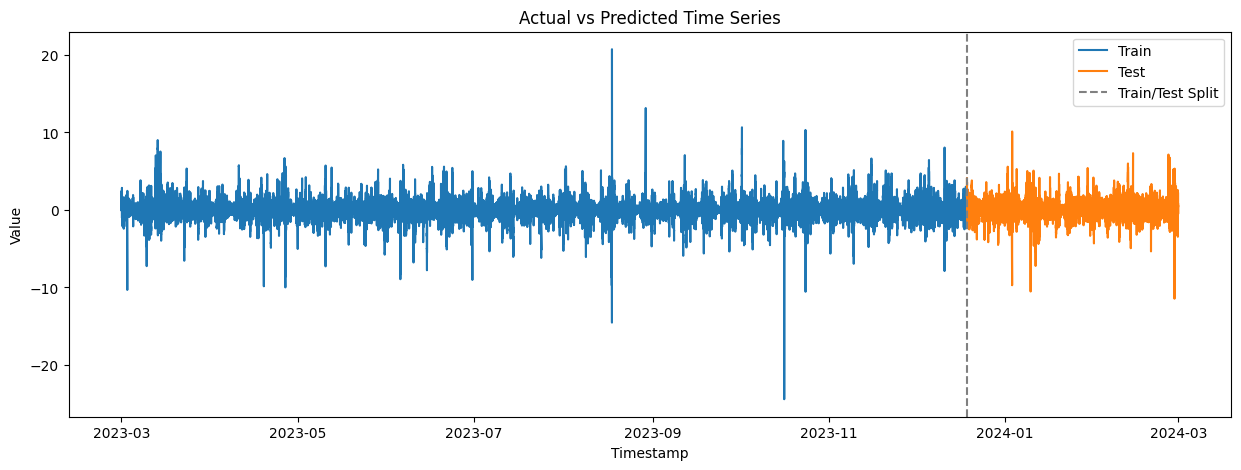

In [8]:
from functions import plot_actual_vs_pred

plot_actual_vs_pred(y_train, y_test, y_pred)

<Axes: title={'center': 'Actual vs Predicted'}>

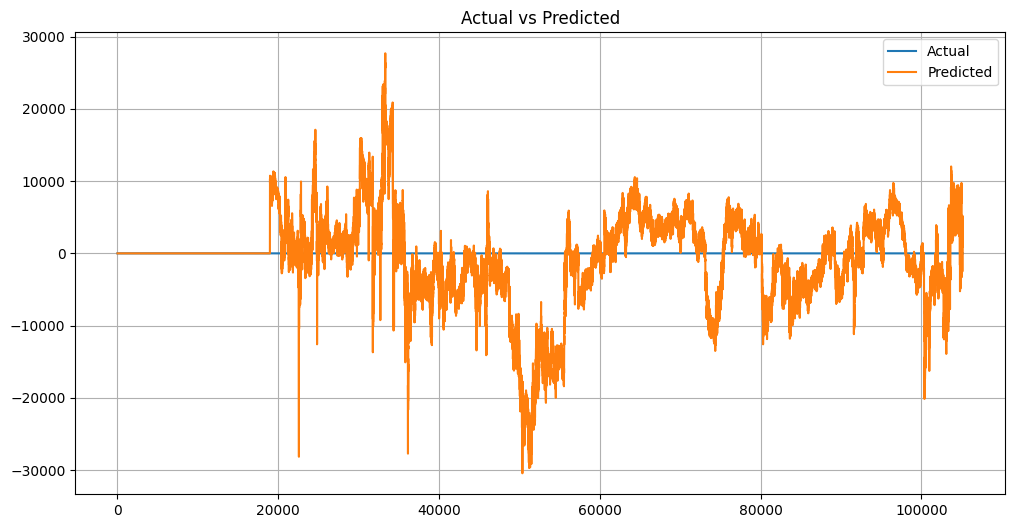

In [9]:
pd.concat([pd.DataFrame(y_test).reset_index(drop=True).rename(columns={'label': 'Actual'}), pd.DataFrame(y_pred).rename(columns={0: 'Predicted'})], axis=1).plot(figsize=(12, 6), title='Actual vs Predicted', grid=True)

## Prediction

In [10]:
params_data = {
    "d1": {
        "start": pd.Timestamp('2023-03-01 00:00:00'),
        "end": pd.Timestamp('2024-02-29 23:59:00')
    },
    "d2": {
        "start": pd.Timestamp('2023-06-01 00:00:00'),
        "end": pd.Timestamp('2024-02-29 23:59:00')
    },
    "d3": {
        "start": pd.Timestamp('2023-09-01 00:00:00'),
        "end":   pd.Timestamp('2024-02-29 23:59:00')
    },
    # "d4": {
    #     "start": pd.Timestamp('2023-12-01 00:00:00'),
    #     "end":   pd.Timestamp('2024-02-29 23:59:00')
    # }
}

params_split = {
    "ts1": {
        "splitter_func": sklearn_timeseries_split,
        "splitter_args": {"n_splits": 5}
    },
    # "ts2": {
    #     "splitter_func": sklearn_timeseries_split,
    #     "splitter_args": {"n_splits": 10}
    # },
    "wf1": {
        "splitter_func": walk_forward_split,
        "splitter_args": {
            "initial_train_size": 129600, # 3 months of data
            "test_size": 10080,
            "step_size": 10080
        }
    },
    # "wf2": {
    #     "splitter_func": walk_forward_split,
    #     "splitter_args": {
    #         "initial_train_size": 1000,
    #         "test_size": 200,
    #         "step_size": 200
    #     }
    # }
}

params_model = {
    "ols_m1": {
        "model_func": fit_linear_regression,
        "model_args": {}
    },
    "ridge_m1": {
        "model_func": fit_linear_ridge,
        "model_args": {"alpha": 1.0}
    },
    "lasso_m1": {
        "model_func": fit_linear_lasso,
        "model_args": {"alpha": 0.1}
    },
    "enet_m1": {
        "model_func": fit_linear_elasticnet,
        "model_args": {"alpha": 0.1, "l1_ratio": 0.5}
    },
    # "quantile_m1": {
    #     "model_func": fit_linear_quantileregressor,
    #     "model_args": {"quantile": 0.5, "alpha": 0.0, "solver": "highs-ds"}
    # },
    # "quantile_m2": {
    #     "model_func": fit_linear_quantileregressor,
    #     "model_args": {"quantile": 0.75, "alpha": 0.0, "solver": "highs"}
    # },
    # "quantile_m3": {
    #     "model_func": fit_linear_quantileregressor,
    #     "model_args": {"quantile": 0.9, "alpha": 0.0, "solver": "highs"}
    # },
    "ransac_m1": {
        "model_func": fit_linear_ransac,
        "model_args": {}
    },
    # "theilsen_m1": {
    #     "model_func": fit_linear_theilsen,
    #     "model_args": {}
    # },
    # "huber_m1": {
    #     "model_func": fit_linear_huber,
    #     "model_args": {"epsilon": 1.35}
    # }
}

In [11]:
from evaluate import evaluate_model
from tqdm import tqdm

def evaluate_grid(X, y, params_data, params_split, params_model, is_linear=True, metric_func=evaluate_model):
    all_results = []

    # Calculate total iterations for tqdm progress bar
    total_iters = len(params_data) * len(params_split) * len(params_model)

    with tqdm(total=total_iters, desc="Total Model Runs") as pbar:
        for data_key, data_val in params_data.items():
            mask = (X.index >= data_val['start']) & (X.index <= data_val['end'])
            X_window = X.loc[mask]
            y_window = y.loc[mask]

            for split_key, split_val in params_split.items():
                splitter_func = split_val['splitter_func']
                splitter_args = split_val['splitter_args']
                splits = list(splitter_func(X_window, **splitter_args))

                for model_key, model_val in params_model.items():
                    model_func = model_val['model_func']
                    model_args = model_val['model_args']

                    print(f"Evaluating {data_key} - {split_key} - {model_key}")

                    split_results = []

                    for i, (train_idx, test_idx) in enumerate(splits):
                        X_train, X_test = X_window.iloc[train_idx], X_window.iloc[test_idx]
                        y_train, y_test = y_window.iloc[train_idx], y_window.iloc[test_idx]

                        model = model_func(X_train, y_train, **model_args)
                        y_pred = model.predict(X_test)
                        metric_dict = metric_func(y_test, y_pred, X=X_test, linear=is_linear, verbose=False)
                        metric_dict['split_num'] = i
                        split_results.append(metric_dict)

                    split_df = pd.DataFrame(split_results)
                    metrics_to_agg = [col for col in split_df.columns if col != "split_num"]
                    overall_results = split_df[metrics_to_agg].mean().to_dict()
                    model_output = {
                        "data_key": data_key,
                        "split_key": split_key,
                        "model_key": model_key,
                        **overall_results,
                        "n_splits": len(split_df),
                    }
                    all_results.append(model_output)
                    pbar.update(1)
    return all_results

results = evaluate_grid(
    X=X, 
    y=y, 
    params_data=params_data, 
    params_split=params_split, 
    params_model=params_model, 
    metric_func=evaluate_model
)

Total Model Runs:   0%|          | 0/30 [00:00<?, ?it/s]

Evaluating d1 - ts1 - ols_m1


Total Model Runs:   3%|▎         | 1/30 [00:37<18:06, 37.47s/it]

Evaluating d1 - ts1 - ridge_m1


Total Model Runs:   7%|▋         | 2/30 [00:53<11:35, 24.86s/it]

Evaluating d1 - ts1 - lasso_m1


Total Model Runs:  10%|█         | 3/30 [01:00<07:25, 16.51s/it]

Evaluating d1 - ts1 - enet_m1


Total Model Runs:  13%|█▎        | 4/30 [01:09<05:58, 13.79s/it]

Evaluating d1 - ts1 - ransac_m1


Total Model Runs:  17%|█▋        | 5/30 [02:37<16:52, 40.48s/it]

Evaluating d1 - wf1 - ols_m1


Total Model Runs:  20%|██        | 6/30 [07:41<52:03, 130.14s/it]

Evaluating d1 - wf1 - ridge_m1


Total Model Runs:  23%|██▎       | 7/30 [10:06<51:46, 135.06s/it]

Evaluating d1 - wf1 - lasso_m1


Total Model Runs:  27%|██▋       | 8/30 [11:00<40:01, 109.17s/it]

Evaluating d1 - wf1 - enet_m1


Total Model Runs:  30%|███       | 9/30 [11:54<32:08, 91.85s/it] 

Evaluating d1 - wf1 - ransac_m1


Total Model Runs:  33%|███▎      | 10/30 [25:19<1:44:00, 312.04s/it]

Evaluating d2 - ts1 - ols_m1


Total Model Runs:  37%|███▋      | 11/30 [25:45<1:11:03, 224.39s/it]

Evaluating d2 - ts1 - ridge_m1


Total Model Runs:  40%|████      | 12/30 [25:56<47:52, 159.57s/it]  

Evaluating d2 - ts1 - lasso_m1


Total Model Runs:  43%|████▎     | 13/30 [26:01<31:54, 112.63s/it]

Evaluating d2 - ts1 - enet_m1


Total Model Runs:  47%|████▋     | 14/30 [26:07<21:27, 80.45s/it] 

Evaluating d2 - ts1 - ransac_m1


Total Model Runs:  50%|█████     | 15/30 [27:29<20:14, 80.96s/it]

Evaluating d2 - wf1 - ols_m1


Total Model Runs:  53%|█████▎    | 16/30 [30:05<24:08, 103.50s/it]

Evaluating d2 - wf1 - ridge_m1


Total Model Runs:  57%|█████▋    | 17/30 [31:18<20:27, 94.40s/it] 

Evaluating d2 - wf1 - lasso_m1


Total Model Runs:  60%|██████    | 18/30 [31:46<14:53, 74.45s/it]

Evaluating d2 - wf1 - enet_m1


Total Model Runs:  63%|██████▎   | 19/30 [32:30<11:59, 65.45s/it]

Evaluating d2 - wf1 - ransac_m1


Total Model Runs:  67%|██████▋   | 20/30 [41:20<34:07, 204.77s/it]

Evaluating d3 - ts1 - ols_m1


Total Model Runs:  70%|███████   | 21/30 [41:39<22:21, 149.06s/it]

Evaluating d3 - ts1 - ridge_m1


Total Model Runs:  73%|███████▎  | 22/30 [41:53<14:27, 108.42s/it]

Evaluating d3 - ts1 - lasso_m1


Total Model Runs:  77%|███████▋  | 23/30 [41:56<08:59, 77.01s/it] 

Evaluating d3 - ts1 - enet_m1


Total Model Runs:  80%|████████  | 24/30 [42:01<05:31, 55.20s/it]

Evaluating d3 - ts1 - ransac_m1


Total Model Runs:  83%|████████▎ | 25/30 [43:22<05:15, 63.12s/it]

Evaluating d3 - wf1 - ols_m1


Total Model Runs:  87%|████████▋ | 26/30 [44:32<04:20, 65.08s/it]

Evaluating d3 - wf1 - ridge_m1


Total Model Runs:  90%|█████████ | 27/30 [45:25<03:04, 61.60s/it]

Evaluating d3 - wf1 - lasso_m1


Total Model Runs:  93%|█████████▎| 28/30 [45:39<01:34, 47.05s/it]

Evaluating d3 - wf1 - enet_m1


Total Model Runs:  97%|█████████▋| 29/30 [45:54<00:37, 37.50s/it]

Evaluating d3 - wf1 - ransac_m1


Total Model Runs: 100%|██████████| 30/30 [49:54<00:00, 99.82s/it]


In [12]:
df_results = pd.DataFrame(results).sort_values(by=['pearson_corr'], ascending=False)
df_results

,data_key,split_key,model_key,n_obs,n_features,r2,adj_r2,rmse,mae,medae,pearson_corr,pearson_pvalue,aic,bic,n_splits
26,d3,wf1,ridge_m1,10080.0,870.0,-8.715565e+00,-9.633421e+00,2.488659e+00,1.582463e+00,1.270383,0.080807,2.383984e-02,1.640968e+04,2.269683e+04,13
25,d3,wf1,ols_m1,10080.0,870.0,-1.308489e+06,-1.432106e+06,4.354138e+02,2.250520e+02,1.635128,0.063060,8.394791e-02,3.228191e+04,3.856905e+04,13
6,d1,wf1,ridge_m1,10080.0,870.0,-2.132125e+00,-2.428026e+00,1.506056e+00,1.056493e+00,0.787254,0.059332,6.225651e-02,7.808151e+03,1.409530e+04,39
16,d2,wf1,ridge_m1,10080.0,870.0,-1.876457e+00,-2.148204e+00,1.546148e+00,1.118708e+00,0.873291,0.057940,1.214367e-01,9.712326e+03,1.599947e+04,26
15,d2,wf1,ols_m1,10080.0,870.0,-3.345442e+04,-3.661505e+04,5.023690e+01,2.365513e+01,0.965034,0.053479,6.465353e-02,1.614816e+04,2.243530e+04,26
5,d1,wf1,ols_m1,10080.0,870.0,-2.644243e+04,-2.894061e+04,2.898837e+01,1.283413e+01,0.911336,0.050181,7.421054e-02,1.273462e+04,1.902177e+04,39
1,d1,ts1,ridge_m1,87647.0,870.0,-4.532171e+00,-4.587635e+00,2.048904e+00,1.435769e+00,1.112862,0.049820,2.311364e-06,1.067610e+05,1.149319e+05,5
28,d3,wf1,enet_m1,10080.0,870.0,-2.184777e-02,-1.183846e-01,1.026999e+00,7.070603e-01,0.493223,0.046712,8.919319e-02,1.955893e+03,8.243040e+03,13
0,d1,ts1,ols_m1,87647.0,870.0,-3.777351e+10,-3.815222e+10,9.226897e+04,6.748594e+04,51282.619520,0.032965,6.343861e-09,6.541290e+05,6.623000e+05,5
23,d3,ts1,enet_m1,43571.0,870.0,-4.599297e-03,-2.506771e-02,1.041405e+00,6.908752e-01,0.470975,0.025054,2.546179e-02,5.110015e+03,1.267217e+04,5


In [13]:
df_results.to_csv('results/linear_regression_results.csv', index=False)